In [1]:
from requests.auth import HTTPBasicAuth
import requests
import pandas as pd

url = 'https://api.fitrockr.com' + '/v1/status/greet'
headers = {'Accept': 'application/json'}
#auth = HTTPBasicAuth('apikey', '0a66e421-c755-4794-82c3-451bed8ff4fd')
#files = {'file': open('filename', 'rb')}
headers = {'Accept': 'application/json', 'X-Tenant': 'hackzurich', 'X-API-Key': '0a66e421-c755-4794-82c3-451bed8ff4fd'}

req = requests.get(url, headers=headers)

In [2]:
print(req)

<Response [200]>


In [3]:
url = 'https://api.fitrockr.com/v1/users?page=0&size=100'
req = requests.get(url, headers=headers)
req.json()

[{'id': '613c42db06cf9f7196d255af',
  'firstName': 'Fitrockr',
  'lastName': 'Support',
  'profilePicUrl': None},
 {'id': '613db206309a3f06bfa3d028',
  'firstName': 'Test',
  'lastName': 'User',
  'profilePicUrl': None},
 {'id': '613db3d1309a3f06bfa4046c',
  'firstName': 'HackZurich',
  'lastName': 'Test03',
  'profilePicUrl': None},
 {'id': '613dc4c9309a3f06bfa716ee',
  'firstName': 'Christof',
  'lastName': 'Kuhlmeyer',
  'profilePicUrl': None},
 {'id': '613f5ed4da309d6b0fabe0af',
  'firstName': 'HackZurich',
  'lastName': 'Test01',
  'profilePicUrl': None},
 {'id': '613f5ed4da309d6b0fabe0b0',
  'firstName': 'HackZurich',
  'lastName': 'Test06',
  'profilePicUrl': None},
 {'id': '613f5ed4da309d6b0fabe0b1',
  'firstName': 'HackZurich',
  'lastName': 'Test05',
  'profilePicUrl': None},
 {'id': '613f5ed4da309d6b0fabe0b2',
  'firstName': 'HackZurich',
  'lastName': 'Test03',
  'profilePicUrl': None},
 {'id': '613f5ed4da309d6b0fabe0b3',
  'firstName': 'HackZurich',
  'lastName': 'Test02',

In [4]:
len(req.json())

85

In [5]:
df_users = pd.DataFrame(req.json())

df_users.head()

,id,firstName,lastName,profilePicUrl
0,613c42db06cf9f7196d255af,Fitrockr,Support,None
1,613db206309a3f06bfa3d028,Test,User,None
2,613db3d1309a3f06bfa4046c,HackZurich,Test03,None
3,613dc4c9309a3f06bfa716ee,Christof,Kuhlmeyer,None
4,613f5ed4da309d6b0fabe0af,HackZurich,Test01,None


In [7]:
# DO NOT DO THIS!!!
user_data = []
for user in df_users['id'].tolist():
    url = f'https://api.fitrockr.com/v1/users/{user}/profile'
    req = requests.get(url, headers=headers)
    user_data.append(req.json())



KeyboardInterrupt: 

In [ ]:
# DO NOT DO THIS
user_daily_summary = []
for user in df_users['id'].tolist():
    url = f'https://api.fitrockr.com/v1/users/{user}/dailySummaries'
    req = requests.get(url, headers=headers)
    user_daily_summary.append(req.json())


In [ ]:
import json
with open('userdata.json', 'w') as f:
    f.write(json.dumps(user_data))

## Useful data
- User Profile 
  - Genders are all: M
  - Country seems to be: DE (to be checked)
  - age info (year of birth info)
  - Look into `basalMetabolism` of users (https://www.healthline.com/health/what-is-basal-metabolic-rate)
  - 
- Heart Rate
  - Heart rate per user 
- Activities
  - calories
  - Distance
  - Steps
- Intraday++
  - +metabolic value
  - ++Stress 
- Motion Intensity +
- Sleep
- BBI
- Reports Kpi



In [ ]:
df_user_data = pd.DataFrame(user_data)
df_user_data.head(100)

,id,firstName,lastName,profilePicUrl,basalMetabolism,gender,country,city,language,timeZone,...,height,heightUOM,weight,weightUOM,lastSync,trackerName,active,usualSleepStartTime,usualSleepEndTime,imperialUnits
0,613c42db06cf9f7196d255af,Fitrockr,Support,None,1853.0,m,DE,None,en,Europe/Berlin,...,180.0,cm,90.0,kg,None,None,True,None,None,False
1,613db206309a3f06bfa3d028,Test,User,None,1920.0,m,DE,,en,Europe/Berlin,...,180.0,cm,80.0,kg,2021-09-14T16:26:25+0000,Garmin,True,None,None,False
2,613db3d1309a3f06bfa4046c,HackZurich,Test03,None,1783.0,m,DE,,en,Etc/GMT+1,...,180.0,cm,75.0,kg,2021-09-14T15:37:54+0000,None,True,None,None,False
3,613dc4c9309a3f06bfa716ee,Christof,Kuhlmeyer,None,1845.0,m,DE,Berlin,en,Europe/Berlin,...,180.0,cm,85.0,kg,2021-09-24T17:17:40+0000,Garmin,True,None,None,False
4,613f5ed4da309d6b0fabe0af,HackZurich,Test01,None,1783.0,m,DE,None,en,Etc/GMT+1,...,180.0,cm,75.0,kg,2021-09-13T14:24:32+0000,Garmin,True,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,613f5ed8da309d6b0fabe0f0,HackZurich,Test62,None,1783.0,m,DE,None,en,Etc/GMT+1,...,180.0,cm,75.0,kg,None,None,True,None,None,False
70,613f5ed8da309d6b0fabe0f1,HackZurich,Test68,None,1783.0,m,DE,None,en,Etc/GMT+1,...,180.0,cm,75.0,kg,None,None,True,None,None,False
71,613f5ed8da309d6b0fabe0f2,HackZurich,Test67,None,1783.0,m,DE,None,en,Etc/GMT+1,...,180.0,cm,75.0,kg,None,None,True,None,None,False
72,6141b615d60f0959d940f423,Garmin,API-Support,None,1665.0,m,DE,Würzburg,en,Africa/Abidjan,...,170.0,cm,70.0,kg,None,None,True,None,None,False


In [ ]:
df_user_summary = pd.DataFrame(user_daily_summary)
df_user_summary.head(20)

,userMessage,technicalMessage,stacktrace
0,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
1,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
2,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
3,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
4,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
5,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
6,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
7,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
8,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...
9,Required LocalDate parameter 'startDate' is no...,Bad Request: Required LocalDate parameter 'sta...,org.springframework.web.bind.MissingServletReq...


df_user_data['language'].unique()

In [ ]:
df_user_data['usualSleepEndTime'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: usualSleepEndTime, dtype: object

In [ ]:
df_user_data[df_user_data['usualSleepEndTime'] == None].count()

id                     0
firstName              0
lastName               0
profilePicUrl          0
basalMetabolism        0
gender                 0
country                0
city                   0
language               0
timeZone               0
email                  0
yearOfBirth            0
height                 0
heightUOM              0
weight                 0
weightUOM              0
lastSync               0
trackerName            0
active                 0
usualSleepStartTime    0
usualSleepEndTime      0
imperialUnits          0
dtype: int64

## Select user

We are interested in individual statistics because

- The group data is _extremely_ messy and does not provide close to representative data
- No correlations seem to be possible between the data (all Male, all DE, Same TZ)

So we decided to focus on individual heart-rate data

In [8]:
user = '614ee7aa9187a32ff31d85c5'
url = f'https://api.fitrockr.com/v1/users/{user}/heartRate?startDate=2021-09-25&endDate=2021-09-26' 
    


headers = {'Accept': 'application/json'}
#auth = HTTPBasicAuth('apikey', '0a66e421-c755-4794-82c3-451bed8ff4fd')
#files = {'file': open('filename', 'rb')}
headers = {'Accept': 'application/json', 'X-Tenant': 'hackzurich', 'X-API-Key': '0a66e421-c755-4794-82c3-451bed8ff4fd'}

req = requests.get(url, headers=headers)

In [10]:
df = pd.DataFrame(req.json())
df.head()

,userId,startTime,calendarDate,startTimeInSeconds,startTimeOffsetInSeconds,value
0,614ee7aa9187a32ff31d85c5,"{'date': {'year': 2021, 'month': 9, 'day': 25}...",2021-09-25,1632570120,7200,84
1,614ee7aa9187a32ff31d85c5,"{'date': {'year': 2021, 'month': 9, 'day': 25}...",2021-09-25,1632570105,7200,84
2,614ee7aa9187a32ff31d85c5,"{'date': {'year': 2021, 'month': 9, 'day': 25}...",2021-09-25,1632570090,7200,84
3,614ee7aa9187a32ff31d85c5,"{'date': {'year': 2021, 'month': 9, 'day': 25}...",2021-09-25,1632570075,7200,84
4,614ee7aa9187a32ff31d85c5,"{'date': {'year': 2021, 'month': 9, 'day': 25}...",2021-09-25,1632570060,7200,85


The columns of interest are: `value` and `startTimeInSeconds`, so we drop other columns

In [13]:
df_time = df[['value', 'startTimeInSeconds']]

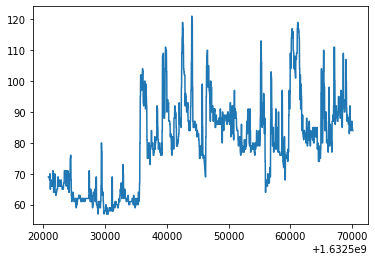

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(df_time['startTimeInSeconds'], df_time['value']);
#plt.plot(x, np.cos(x), '--');

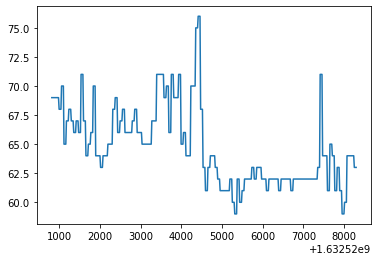

In [25]:
# Let's zoom into the data a bit

dff = df_time.tail(500)
fig = plt.figure()
plt.plot(dff['startTimeInSeconds'], dff['value'])

The graph above shows that the subject may have fallen asleep (heart rate goes lower during sleep). These graphs, and this data when running on a big data platform like Flink or Spark will be invaluable to:
- Detect heart conditions like arrythmic beats earlier
- Detect Sleep Apnea

### Sleep Apnea
Around 1/10th of the global female population and 1/4th of men have sleep apnea. It is a disease that deteriorates health and goes unnoticed. 

Symptoms of sleep apnea can be discovered earlier using the sensors on smartwatches like Garmin. Pulse Oximetry combined with heart rate may be useful to detect symptoms (to a high degree of confidence) of sleep apnea.

The libraries available around heart-rate-variability measurements did not match the format of Fitrockr api (which was more human-friendly).

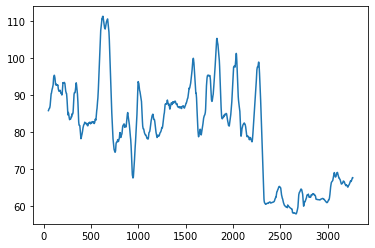

In [29]:
df['value'].rolling(window=50).mean().plot();

Running a moving average normalizes the data and provides insights into what might be going on. E.g., the distance between the peaks. Sleep Apnea detection can be easily integrated into the PlanetHealth app, thus providing a great value to customers.

In [30]:
user = '614ee7aa9187a32ff31d85c5'
url = f'https://api.fitrockr.com/v1/users/614ee7aa9187a32ff31d85c5/intraDays?startDate=2021-09-25&endDate=2021-09-26' 
    


headers = {'Accept': 'application/json'}
#auth = HTTPBasicAuth('apikey', '0a66e421-c755-4794-82c3-451bed8ff4fd')
#files = {'file': open('filename', 'rb')}
headers = {'Accept': 'application/json', 'X-Tenant': 'hackzurich', 'X-API-Key': '0a66e421-c755-4794-82c3-451bed8ff4fd'}

req = requests.get(url, headers=headers)

In [31]:
df = pd.DataFrame(req.json())

In [32]:
df.head()

,id,userId,summaryId,activityType,calendarDate,startTime,endTime,startTimeInSeconds,startTimeOffsetInSeconds,durationInSeconds,...,activeSeconds,metValue,intensity,meanMotionIntensity,maxMotionIntensity,averageStressLevel,maxStressLevel,minHeartRateInBeatsPerMinute,avgHeartRateInBeatsPerMinute,maxHeartRateInBeatsPerMinute
0,x43453fc-614e9ec0-6,614ee7aa9187a32ff31d85c5,x43453fc-614e9ec0-6,WALKING,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632542400,7200,900,...,300,4.293757,ACTIVE,1.6,2.0,None,None,None,None,None
1,x43453fc-614e9ec0-0,614ee7aa9187a32ff31d85c5,x43453fc-614e9ec0-0,GENERIC,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632542400,7200,900,...,0,1.000000,SEDENTARY,0.0,4.0,None,None,None,None,None
2,x43453fc-614e9ec0-8,614ee7aa9187a32ff31d85c5,x43453fc-614e9ec0-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632542400,7200,900,...,600,1.000000,SEDENTARY,0.0,3.0,None,None,None,None,None
3,x43453fc-614ea244-6,614ee7aa9187a32ff31d85c5,x43453fc-614ea244-6,WALKING,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632543300,7200,900,...,180,4.398321,ACTIVE,2.0,2.0,None,None,None,None,None
4,x43453fc-614ea244-0,614ee7aa9187a32ff31d85c5,x43453fc-614ea244-0,GENERIC,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632543300,7200,900,...,0,1.000000,SEDENTARY,0.0,0.0,None,None,None,None,None


The stats of the `activityType` may be interesting:

In [40]:
print(df['activityType'].unique())

df[df['activityType'] == 'SEDENTARY']

['WALKING' 'GENERIC' 'SEDENTARY']


,id,userId,summaryId,activityType,calendarDate,startTime,endTime,startTimeInSeconds,startTimeOffsetInSeconds,durationInSeconds,...,activeSeconds,metValue,intensity,meanMotionIntensity,maxMotionIntensity,averageStressLevel,maxStressLevel,minHeartRateInBeatsPerMinute,avgHeartRateInBeatsPerMinute,maxHeartRateInBeatsPerMinute
2,x43453fc-614e9ec0-8,614ee7aa9187a32ff31d85c5,x43453fc-614e9ec0-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632542400,7200,900,...,600,1.0,SEDENTARY,0.0,3.0,None,None,None,None,None
5,x43453fc-614ea244-8,614ee7aa9187a32ff31d85c5,x43453fc-614ea244-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632543300,7200,900,...,720,1.0,SEDENTARY,0.0,4.0,None,None,None,None,None
6,x43453fc-614ea5c8-8,614ee7aa9187a32ff31d85c5,x43453fc-614ea5c8-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632544200,7200,900,...,900,1.0,SEDENTARY,0.0,3.0,None,None,None,None,None
8,x43453fc-614ea94c-8,614ee7aa9187a32ff31d85c5,x43453fc-614ea94c-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632545100,7200,900,...,840,1.0,SEDENTARY,0.0,5.0,None,None,None,None,None
11,x43453fc-614eacd0-8,614ee7aa9187a32ff31d85c5,x43453fc-614eacd0-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632546000,7200,900,...,420,1.0,SEDENTARY,0.0,5.0,None,None,None,None,None
12,x43453fc-614eb054-8,614ee7aa9187a32ff31d85c5,x43453fc-614eb054-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632546900,7200,900,...,900,1.0,SEDENTARY,0.0,4.0,None,None,None,None,None
13,x43453fc-614eb3d8-8,614ee7aa9187a32ff31d85c5,x43453fc-614eb3d8-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632547800,7200,900,...,900,1.0,SEDENTARY,0.0,4.0,None,None,None,None,None
14,x43453fc-614eb75c-8,614ee7aa9187a32ff31d85c5,x43453fc-614eb75c-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632548700,7200,900,...,900,1.0,SEDENTARY,0.0,2.0,None,None,None,None,None
15,x43453fc-614ebae0-8,614ee7aa9187a32ff31d85c5,x43453fc-614ebae0-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632549600,7200,900,...,900,1.0,SEDENTARY,0.0,3.0,None,None,None,None,None
16,x43453fc-614ebe64-8,614ee7aa9187a32ff31d85c5,x43453fc-614ebe64-8,SEDENTARY,2021-09-25,"{'date': {'year': 2021, 'month': 9, 'day': 25}...","{'date': {'year': 2021, 'month': 9, 'day': 25}...",1632550500,7200,900,...,900,1.0,SEDENTARY,0.0,3.0,None,None,None,None,None
